# **Classifying Muffins and Cupcakes with SVM**

In [1]:
from sklearn.svm import SVC

In [2]:
# Packages for analysis
import numpy as np
import pandas as pd
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

__Step 2:__ Import Data

In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


__Step 3:__ Prepare the Data

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


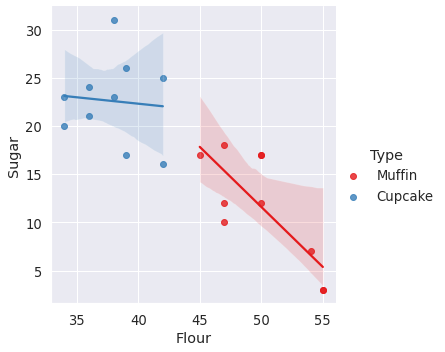

In [7]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1')

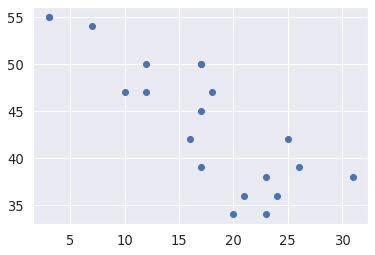

In [19]:
plt.scatter(recipes.Sugar,recipes.Flour)

In [4]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
#input: X
ingredients = recipes[['Flour','Sugar']]
ingredients[:3]

,Flour,Sugar
0,55,3
1,47,12
2,47,18


In [5]:
recipes.Type[:2]

0    Muffin
1    Muffin
Name: Type, dtype: object

In [6]:
#output y ==> convert muffin as 0 and Cupcake as 1
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

In [7]:
type_label[:3]

array([0, 0, 0])

__Step 4:__ Fit the Model

In [8]:
from sklearn import svm

In [ ]:
#from sklearn.svm import SVC

In [9]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [13]:
#check data accuracy
model.score(ingredients, type_label)*100

100.0

In [26]:
# Fit the SVM model
model2 = svm.SVC()
model2.fit(ingredients, type_label)
#check data accuracy
model2.score(ingredients, type_label)*100

95.0

__Step 5:__ Visualize Results

In [27]:
model.coef_

array([[-6.66503014e-01, -7.77156117e-16]])

In [28]:
model.intercept_

array([28.99296292])

In [30]:
#flour and sugar data
model.predict([[42,20]])

array([1])

In [35]:
model.support_vectors_

array([[45., 17.],
       [42., 16.],
       [42., 25.]])

In [52]:
np.linspace(30, 60)

array([30.        , 30.6122449 , 31.2244898 , 31.83673469, 32.44897959,
       33.06122449, 33.67346939, 34.28571429, 34.89795918, 35.51020408,
       36.12244898, 36.73469388, 37.34693878, 37.95918367, 38.57142857,
       39.18367347, 39.79591837, 40.40816327, 41.02040816, 41.63265306,
       42.24489796, 42.85714286, 43.46938776, 44.08163265, 44.69387755,
       45.30612245, 45.91836735, 46.53061224, 47.14285714, 47.75510204,
       48.36734694, 48.97959184, 49.59183673, 50.20408163, 50.81632653,
       51.42857143, 52.04081633, 52.65306122, 53.26530612, 53.87755102,
       54.48979592, 55.10204082, 55.71428571, 56.32653061, 56.93877551,
       57.55102041, 58.16326531, 58.7755102 , 59.3877551 , 60.        ])

In [16]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


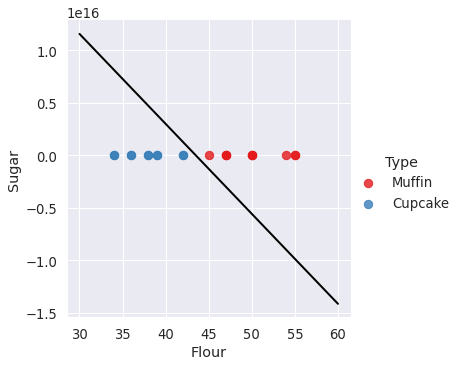

In [37]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [49]:
model.support_vectors_[:,1]

array([17., 16., 25.])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


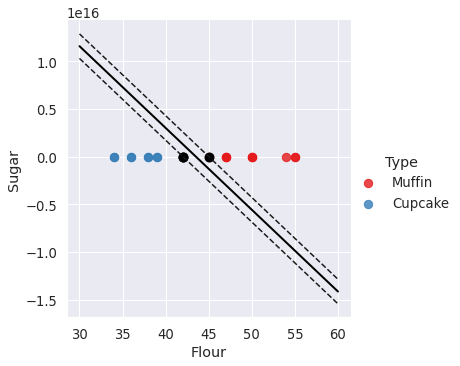

In [51]:
# Look at the margins and support vectors
#data samples
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'k--') #marginLine1
plt.plot(xx, yy_up, 'k--') #margineLine2
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='black');

__Step 6:__ Predict New Case

In [10]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [26]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(20,30)

You're looking at a cupcake recipe!


/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


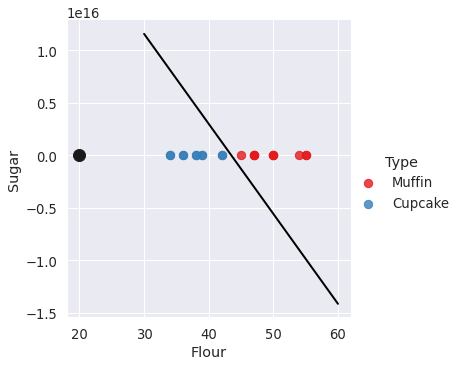

In [25]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 30, 'ko', markersize='12');